<img src='images/header.png' style='height: 50px; float: left'>

## Introduction to Computational Social Science methods with Python

# Session D4. Topic modeling


**Topic modeling** is a technique in natural language processing (NLP) used to uncover underlying themes in a large corpus of text. The goal of topic modeling is to identify the most important topics in a collection of documents and to extract the most important words and phrases associated with each topic. There are several popular topic modeling algorithms, including **Latent Dirichlet Allocation (LDA)** and Non-Negative Matrix Factorization (NMF). These algorithms are **unsupervised**, meaning that they do not require labeled data. On the contrary, they are based on the assumption that words that frequently occur together in a document are likely to be associated with the same topic.

Topic modeling typically involves the following steps:

- Preprocessing the data: The text data is cleaned and preprocessed to remove unnecessary information such as stop words, punctuation, and special characters.
- Vectorization: the preprocessed text data is converted into a numerical vector representation, such as a bag-of-words or TF-IDF (Term Frequency-Inverse Document Frequency) matrix.
- Model training: a topic modeling algorithm is applied to the vectorized text data to identify the main topics or themes. This includes identifying the words or phrases most strongly associated with each topic.
- Theme Interpretation: the resulting themes are interpreted by examining the most representative words or phrases for each theme. This may involve manually examining the most important words for each theme or using automated techniques to summarize the themes.

First, let's compare LDA with Latent Semantic Analysis (LSA), which is based on Truncated SVD (you have learned in the previous session). LSA operates by performing a matrix factorization on a term-document matrix to extract latent semantic features. However, LSA does not explicitly model the generative process of how documents are created or the distribution of topics within documents.

<div class='alert alert-block alert-success'>
<b>In this session</b>, 

you will learn about basics of the Topic Modeling. In subsession **D4.1**, we will explain Latent Semantic Analysis and how it is related to Single Value Decomposition, and ypi will execute model on bag-of-words build from news tweets. In **D3.2**, we will show how to implement a Topic Modeling usind Latent Dirichlet Allocation (LDA). Moreover, in subsection **D4.3** we will touch uppon assesment and visualisation of learned models.   
</div>

## D4.1 Latent Semantic Analysis (LSA)

**Latent topics** refer to a hidden thematic concept or underlying theme within a collection of documents. It represents a high-level abstract idea or subject that is not explicitly stated but can be inferred from the patterns of word usage within the documents. Latent topics provide a way to group related documents together based on shared content.

Dimensionality reduction techniques, such as Latent Semantic Analysis (LSA), can help discover topics by reducing the dimensionality of the document-term matrix. LSA utilizes matrix factorization methods, such as Truncated SVD (Singular Value Decomposition), to transform the original high-dimensional space of the document-term matrix into a lower-dimensional space. This reduction allows for the extraction of latent semantic features and the identification of hidden patterns that correspond to different topics. By capturing the most informative components, LSA can reveal the underlying topics in a more compact representation.

In LSA, documents are represented in a document-term matrix, where each row corresponds to a document and each column represents a unique term in the entire corpus. The matrix contains term frequencies or other term weighting schemes, such as TF-IDF, as the values in the cells. This matrix captures the frequency or importance of each term in each document, providing a numerical representation of the document's content.


|<img src='images/Topic_modeling_.svg' style='float: none; width: 640px'>|
|:--|
|<em style='float: center'>**Figure 1**: Latent topics</em>|

LSA involves a series of four steps, with the second and third being particularly critical and challenging to grasp. The steps are outlined below:

1. Acquire raw Text Data
2. Create a document-term matrix
3. Apply Singular Value Decomposition (SVD)
4. Explore the data encoded with topics.

The first two steps we have learned in the Session C3. Further we will continue with the data produced in that session. 

Next, we proceed to carry out the singular value decomposition, which can be achieved by utilizing the truncated SVD model from Scikit-Learn or by utilizing LsiModel from gensim. 

**Singular value decomposition (SVD)**, a mathematical technique, is employed to condense a large text into a matrix where each row represents unique words and each column represents a document's word counts. This process reduces the number of rows while preserving the general structure of the columns.

In mathematics, SVD is a method that factorize any matrix *C* into the product of 3 separate matrices:
$
\begin{align}
C = U S V^T
\end{align}
$

|<img src='images/SVD.svg' style='float: none; width: 640px' >|
|:--|
|<em style='float: center'>**Figure 2**: Singular value decomposition (SVD) </em>|

SVD plays a crucial role in reducing dimensionality by selecting the k largest singular values and retaining only the first k columns of the U and V matrices. Here, k represents a hyperparameter that can be adjusted to determine the desired number of topics to extract.

|<img src='images/SVD_trunkated.svg' style='float: none; width: 640px'>|
|:--|
|<em style='float: center'>**Figure 3**: Singular value decomposition (SVD), rank-k approximation</em>|

Intuitively, this can be understood as keeping only the k most significant dimensions in the transformed space.

In this context, the matrix *U (m x k)* serves as the term-topic matrix, while the matrix *V (n x k)* represents the document-topic matrix. In both matrices, each column corresponds to one of the k topics.

$U$: Rows in this matrix represent term vectors expressed in terms of topics.

$V$: Rows in this matrix represent document vectors expressed in terms of topics.

Each row in the $V_k$ matrix (document-topic matrix) represents the vector representation of a specific document. The length of these vectors is equal to k, which corresponds to the desired number of topics. Similarly, the vector representation for terms in the data can be found in the $U_k$ matrix (term-topic matrix).

By utilizing SVD, we obtain vector representations for every document and term in our data, with each vector having a length of k. One significant application of these vectors is finding similar words and documents using cosine similarity as a metric. To compare documents, the cosine of the angle formed by any two vectors created from the columns is utilized, along with the dot product of the normalized vectors. A value close to 1 indicates high similarity between documents, while a value close to 0 suggests significant dissimilarity.

Similar to principal component analysis (PCA), the singular value decomposition allows for encoding the original dataset with these latent features through latent semantic analysis, resulting in a reduction in dimensionality. These latent features correspond to the underlying topics present in the original text data.


Here we present an example of LSA applied to a set of documents. We will use the news articles that we preprocessed in Session C3. 
Let's import the TF-IDF matrix and other data that we previously extracted from this corpus.



In [1]:
import pandas as pd
import pickle as pkl

# import raw dataset 
news = pd.read_csv("../data/news/news_subset.csv")

# import also the dictionary, the preprocessed corpus,  and TF-IDF matrices
with open("../data/news/tf_idf_gensim.pkl", "rb") as file:
    corpus_tfidf = pkl.load(file)

with open("../data/news/dict_gensim.pkl", "rb") as file:
    dct = pkl.load(file)

with open("../data/news/corpus.pkl", "rb") as file:
    corpus = pkl.load(file)
    
with open("../data/news/document_term_matrix.pkl", "rb") as file:
    corpus_bow = pkl.load(file)

Now we will import LSI model from gensim library. *Note: Latent Semantic Indexing (LSI) is a synonym of Latent Semantic Analysis (LSA).* 

We will use tf_idf weights as our corpus. We will also specify the number of topics (*num_topics*) to be extracted.

In [25]:
from gensim.models.lsimodel import LsiModel

lsi_model = LsiModel(corpus=corpus_tfidf, id2word=dct, num_topics=10,chunksize=100 )

Let's inspect which words contribute to which topic:

In [26]:
lsi_model.print_topics()#num_words (int) – The number of words to be included per topics(ordered by significance)

[(0,
  '0.157*"trump" + 0.157*"time" + 0.147*"day" + 0.138*"new" + 0.137*"like" + 0.135*"peopl" + 0.133*"want" + 0.127*"way" + 0.124*"year" + 0.124*"thing"'),
 (1,
  '0.560*"trump" + 0.289*"donald_trump" + 0.276*"presid" + 0.159*"republican" + 0.143*"democrat" + 0.120*"said" + -0.115*"kid" + -0.111*"love" + -0.110*"parent" + -0.108*"photo"'),
 (2,
  '0.477*"photo" + 0.302*"wed" + -0.266*"parent" + -0.229*"kid" + 0.184*"look" + -0.175*"children" + 0.126*"dress" + -0.122*"need" + -0.114*"peopl" + -0.112*"life"'),
 (3,
  '0.344*"kid" + -0.332*"women" + 0.328*"parent" + 0.266*"trump" + -0.206*"year" + 0.170*"day" + 0.160*"mom" + 0.159*"children" + 0.154*"photo" + -0.150*"peopl"'),
 (4,
  '-0.300*"parent" + -0.267*"women" + 0.260*"know" + 0.253*"want" + -0.231*"new" + -0.223*"children" + 0.211*"dont" + -0.197*"year" + -0.180*"divorc" + 0.175*"thing"'),
 (5,
  '0.642*"day" + 0.204*"year" + -0.201*"women" + -0.190*"want" + -0.170*"love" + -0.158*"like" + -0.147*"photo" + 0.140*"mother" + -0.1

When interpreting the encoding matrix, we may focus on identifying the top words associated with each topic or determining the dimensions in the word space that explain the majority of the variance. It is important to note that we need to consider the absolute value of the word expressions within the topic. In this context, a word with a strong negative representation holds the same level of importance as a word with a strong positive representation when interpreting the topics.

According to LSA "trump", "time", "day" and "new" are related words and they contribute to the first topic (*topic 0*). The second topic concerns "donald_trump" too, as well as "republican" and "democrat". 

If we would want to see which documents are related to which topic, we would need to vectorize input corpus in bag-of-word format:  

In [27]:
doc_lsi = lsi_model[corpus_tfidf]

Then we can print probabilities of documents to belong to certain topic, as well as list of stemms created from the text. In the next example we will print probabilities for documents 27 and 28 in the corpus:

In [45]:
for doc, as_text in zip(doc_lsi[27:29], corpus[27:29]): #text_df
    print(doc, as_text)

[(0, 0.08913494033177832), (1, 0.18106540018757797), (2, 0.008162918400419968), (3, 0.04806489019320761), (4, -0.03402112025261824), (5, 0.048260170739779895), (6, 0.03567352261405183), (7, 0.10136627686159357), (8, 0.01568601952270656), (9, 0.0023899220099628236)] ['robert_muel', 'found', 'witch', 'trump', 'claim', 'hunt', 'special_counsel', 'spell', 'link', 'trump', 'campaign', 'russian', 'militari', 'intellig', 'new', 'court', 'file']
[(0, 0.07811084319524991), (1, -0.04712993749360177), (2, -0.07222390342619596), (3, 0.09505903055865207), (4, -0.039594703426103016), (5, -0.02955136109266649), (6, -0.029525610238191134), (7, -0.014217144149449416), (8, -0.0018883849185777606), (9, 0.012510356011972734)] ['littl', 'hack', 'parent', 'easier', 'bath', 'child', 'laundri', 'basket', 'toy', 'dont', 'float', 'away', 'read', 'buzzfe']


Here, the first list shows probability of the document to be in one out of ten topics. 
We can see that the first document is more strongly related to the second topic (*topic 1*) while the second to the *topic 3*. 


Also queries can be incorporated into LSA representations by treating them as additional documents. Similar to the document-term matrix, the query is represented as a vector in the same high-dimensional space. By calculating the similarity between the query vector and the document vectors using cosine similarity or other similarity measures, LSA can rank the documents based on their relevance to the query. This allows for information retrieval and document ranking based on the discovered latent topics.


LSA can be highly beneficial, but it does have its limitations. It is crucial to understand both the advantages and disadvantages of LSA in order to determine when to utilize it and when to explore alternative approaches.

Advantages of LSA:

1. It is efficient and straightforward to implement.
2. It yields considerably better results compared to the plain vector space model.
3. LSA is faster than many other available topic modeling algorithms since it involves decomposing the document term matrix only.

Disadvantages of LSA:

1. Being a linear model, LSA may not perform well on datasets with non-linear dependencies.
2. LSA assumes a Gaussian distribution of terms in documents, which may not hold true for all problems.
3. The computational intensity and difficulty of updating SVD make it challenging to incorporate new data.
4. LSA lacks interpretable embeddings, as the nature of the topics and the components' positivity or negativity can be arbitrary.
5. Accurate results in LSA require a large set of documents and a wide vocabulary.
6. LSA provides less efficient representation in terms of capturing the intricacies of the underlying data.

## D4.2 Latent Dirichlet Allocation (LDA)

On the other hand, LDA is a Bayesian generative model that assumes each document is a mixture of topics, and each topic is a distribution over words. It provides a way to infer the latent topic structure by analyzing the observed words in the documents. LDA assumes the following generative process:
    
- For each document, a distribution of topics is selected from a Dirichlet distribution.
- For each word in the document:
    - Select a topic from the distribution of topics of the document.
    - Select a word from the distribution of words for the selected topic.

LDA is a generative probabilistic model which is generally used for topic modeling. It holds a special role in the ML canon due to its ability to uncover hidden topics in a collection of documents and provide a probabilistic framework for understanding the distribution of topics within each document.


The goal of LDA is to infer the underlying topic distribution for each document and the word distribution for each topic based on the observed words in the corpus. It uses Bayesian inference techniques to estimate these distributions.

Plate notation is often used to represent the graphical model of LDA. In plate notation, circles represent random variables, and rectangles represent plate repetitions. The graphical representation of LDA includes three plates: one for documents, one for topics, and one for words. Arrows denote dependencies between variables.

|<img src="https://upload.wikimedia.org/wikipedia/commons/d/d3/Latent_Dirichlet_allocation.svg" alt="LDA model from https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation" />|
|:--|
|<em style='float: center'>**Figure 4**: LDA model from https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation </em>|



In the LDA model, Alpha represents the parameter controlling the distribution of topics in documents, Theta represents the topic distribution for each document, Beta represents the word distribution for each topic.

To run LDA, you need to specify the number of topics (K) beforehand. The model then estimates the topic distribution (Theta) and word distribution (Beta) using techniques like variational inference or Gibbs sampling. These distributions provide insights into the topics present in the documents and the words associated with each topic.

By comparing the results of LDA with those of LSA, you can observe the differences in the discovered topics. LDA typically produces more interpretable and coherent topics as it explicitly models the generative process of documents and leverages Bayesian inference techniques to estimate topic-word distributions.

Here we present an example of LDA applied to a set of documents. We will use the news articles that we preprocessed in Session 6. We run LDA on the tfidf matrix. We use the Gensim implementation of LDA:

In [94]:
from gensim.models import LdaModel

# train an LDA model on the TF-IDF corpus
lda_model = LdaModel(corpus_tfidf,
                     id2word=dct, 
                     num_topics=10,
                     passes = 10,
                     random_state = 13) 

Note: You can set passes to lower number, if you want to train model faster. With increased number of passes you might get better results.

We can visualize the extracted topics by looking at the 10 most common words of each topic:

In [95]:
for topic in lda_model.print_topics():
    print(topic)

(0, '0.003*"son" + 0.003*"point" + 0.003*"wish" + 0.003*"marri" + 0.003*"cook" + 0.003*"kitchen" + 0.003*"protect" + 0.002*"watch" + 0.002*"signific" + 0.002*"snl"')
(1, '0.008*"embrac" + 0.006*"valentines_day" + 0.006*"paid" + 0.006*"nomin" + 0.005*"cute" + 0.005*"fashion_week" + 0.004*"cheat" + 0.004*"veteran" + 0.004*"cooki" + 0.004*"toy"')
(2, '0.006*"destin" + 0.006*"abort" + 0.005*"lgbt" + 0.005*"camp" + 0.004*"endors" + 0.004*"joe_biden" + 0.004*"size" + 0.004*"region" + 0.003*"nuclear" + 0.003*"arm"')
(3, '0.012*"trump" + 0.007*"donald_trump" + 0.007*"presid" + 0.005*"republican" + 0.005*"democrat" + 0.005*"vote" + 0.005*"state" + 0.004*"hillary_clinton" + 0.004*"said" + 0.004*"senat"')
(4, '0.004*"refuge" + 0.004*"oscar" + 0.004*"confid" + 0.003*"predict" + 0.003*"target" + 0.003*"island" + 0.003*"pressur" + 0.003*"victori" + 0.003*"coffe" + 0.003*"exist"')
(5, '0.006*"want_sur" + 0.006*"check_huffpost" + 0.005*"style_twitt" + 0.005*"facebook_tumblr" + 0.004*"rape" + 0.004*"co

If we compare these topics to one created with the LSA model, we will see that former model had 6 topics that include word "trump" or "donald_trump" which drasticly decrease interpretability of the topics. Incontrust, LDA model returns only one topic (*topic 3*) that focuses on mentions of former US president.

In the following we would like to conclude with the advantages of LDA over LSA: 

1. Probabilistic modeling: LDA is a generative probabilistic model that provides a solid probabilistic framework for understanding the distribution of topics within documents. It models the underlying generative process of how documents are created, assuming a probabilistic distribution of topics. In contrast, LSA is a linear algebra-based technique that lacks a probabilistic interpretation.

2. Topic interpretability: LDA generates a distribution of topics within documents, making it easier to interpret the underlying themes or concepts. Each document is represented as a mixture of topics, and each topic is characterized by a distribution of words. This probabilistic approach allows for more interpretable topics compared to the purely mathematical representations provided by LSA.

3. Capturing word co-occurrence patterns: LDA captures the patterns of word co-occurrence within documents and across the corpus, which is crucial for capturing the underlying topic structure. It considers the statistical dependencies between words and topics, allowing for more accurate representation of the relationship between words and topics. LSA, on the other hand, primarily focuses on capturing word similarity based on co-occurrence patterns, without explicitly modeling the topic structure.

4. Handling of new data: LDA is more flexible when it comes to incorporating new data or updating the model. It supports online learning, which means the model can be incrementally updated with new documents or information. LSA, on the other hand, requires recomputing the matrix decomposition from scratch, making it less suitable for dynamically evolving datasets.

5. Capture of topic correlations: LDA inherently captures the correlations between topics, allowing for a better understanding of the relationships and dependencies between different topics in the data. It models the topic-topic correlations through the Dirichlet prior, while LSA, being a linear model, does not explicitly model such correlations.

## D4.3 Model assessment

### D4.3.1 Select Number of Topics

Determining the optimal number of topics in a given corpus text can be a challenging task. However, there are several approaches that can be considered to determine the optimal number of topics based on the problem statement:

1. The first approach involves treating each topic as a separate cluster and assessing the cluster's effectiveness using the Silhouette coefficient. This coefficient provides a measure of how well individual data points fit within their respective clusters.

2. Another realistic measure for identifying the number of topics is the topic coherence measure. Topic coherence is a widely used metric for evaluating topic models. It utilizes latent variable models, where each generated topic consists of a list of words. In topic coherence, the average or median pairwise word similarity scores for the words within a topic are calculated.

**Coherence score** is a measure of how coherent the topics generated by a topic model are, based on the co-occurrence of words in the corpus. The coherence score is typically based on the top N words in each topic, and measures the similarity between pairs of words in the same topic. There are different ways to define the coherence score, but one common approach is to use the Pointwise Mutual Information (PMI) between pairs of words.

PMI measures the degree of association between two words, based on the probability of their co-occurrence in the corpus relative to their individual probabilities. A high PMI score indicates that the two words are strongly associated and likely to appear together in the same context.

The coherence score is calculated as the average PMI score over all pairs of words in each topic, and then averaged over all topics in the model. A higher coherence score indicates that the topics are more coherent and contain more related and meaningful words.
Coherence score is often used in combination with perplexity to evaluate the quality of a topic model. Perplexity measures how well the model fits the data, while coherence measures how well the topics generated by the model make sense in terms of the co-occurrence of words in the corpus.

In conclusion, a topic model can be considered good if it achieves a high value of the topic coherence score. This indicates that the topics generated by the model exhibit a strong coherence and capture meaningful relationships among the words.
To assess how good are the topics extracted by the model, we can use different metrics such as the coherence score and perplexity.

Here in this example we will dismiss perplexity score, while recent studies (Krasnov & Sen, 2019; Koltcov et al., 2014) have shown that it on the one hand it does not correlate with human interpretable topics (Chang et al., 2009) and on the other hand it does not have absolute minimum "and with increasing iterations, it becomes asymptotic"(Krasnov & Sen, 2019).

So, we will fit several models and compute their coherence score using *CoherenceModel* from *gensim* library.

In [96]:
from gensim.models import CoherenceModel
 

scores = []
for num_topics in np.arange(6, 21):

    # fit LDA model
    lda_model_tmp = LdaModel(corpus_tfidf, id2word=dct, num_topics=num_topics, random_state=13, passes=10)

    # compute Coherence Score
    coherence_model_lda = CoherenceModel(model=lda_model_tmp, texts=corpus, dictionary=dct, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    #print('\n{0} topics. Coherence Score: {1}'.format(num_topics, coherence_lda))

    scores.append(coherence_lda) 

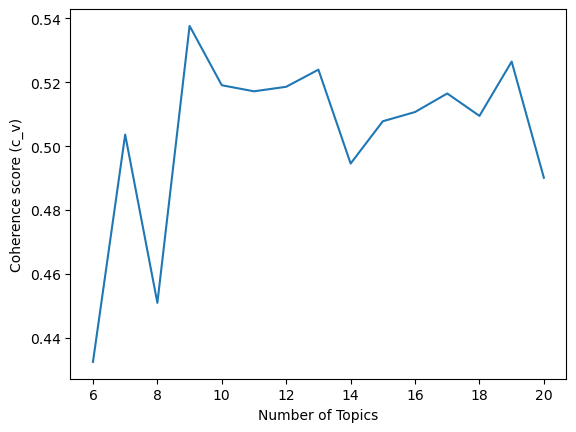

In [97]:
import matplotlib.pyplot as plt

plt.plot(range(6,21),scores)   
plt.xlabel('Number of Topics')
plt.ylabel('Coherence score (c_v)')
plt.show()

Considering that the coherence score shows a consistent increase with the number of topics, it would be more reasonable to select the model that achieved the highest coherence value before reaching a plateau or experiencing a significant drop. In this instance, we chose 9 topics.
So lets' train the final model with 9 topics specified. 

In [98]:
lda_model = LdaModel(corpus_tfidf,
                     id2word=dct, 
                     num_topics=9, 
                     passes = 10,
                     random_state=13)
for topic in lda_model.print_topics():
    print(topic)

(0, '0.006*"photo" + 0.004*"wed" + 0.004*"new" + 0.003*"look" + 0.003*"video" + 0.003*"star" + 0.003*"like" + 0.003*"year" + 0.003*"best" + 0.003*"time"')
(1, '0.005*"valentines_day" + 0.005*"paid" + 0.005*"nomin" + 0.005*"veteran" + 0.004*"halloween" + 0.004*"turkey" + 0.004*"grammi" + 0.004*"bank" + 0.004*"autism" + 0.004*"michelle_obama"')
(2, '0.005*"health_car" + 0.004*"endors" + 0.004*"gop" + 0.003*"direct" + 0.003*"resolut" + 0.003*"town" + 0.003*"vaccin" + 0.003*"prison" + 0.003*"paul_ryan" + 0.003*"stuff"')
(3, '0.009*"trump" + 0.006*"donald_trump" + 0.005*"presid" + 0.004*"said" + 0.004*"republican" + 0.004*"vote" + 0.004*"democrat" + 0.004*"state" + 0.003*"elect" + 0.003*"hillary_clinton"')
(4, '0.003*"forev" + 0.003*"plant" + 0.003*"environ" + 0.003*"chicken" + 0.003*"specif" + 0.003*"gratitud" + 0.003*"repeal" + 0.003*"egg" + 0.003*"lgbt" + 0.003*"storm"')
(5, '0.005*"emot" + 0.004*"dog" + 0.003*"total" + 0.003*"impress" + 0.003*"coach" + 0.003*"urg" + 0.003*"adventur" + 0

### D4.3.3 Visualisation

To visualize the results, you can create graphs such as topic-word distributions, word clouds for each topic, or bar charts representing the topic proportions in different documents.

We can explore visually the topics extracted using the python package `pyLDAvis`. 

The Python library `pyLDAvis` provides a powerful tool for visualizing and interpreting topic models generated using Latent Dirichlet Allocation. With `pyLDAvis`, we can create interactive visualizations that display the topics, the most relevant terms associated with each topic, and the relationships between topics. These visualizations enable us to gain insights into the underlying structure of a corpus of text and to identify patterns and trends that may be difficult to discern through manual analysis alone. Additionally, `pyLDAvis` allows users to customize the visualization parameters and to explore different topic modeling configurations, making it a valuable tool for researchers and data scientists working with large volumes of text data. 

More in detail, we can visualize topics using the intertopic distance map. The intertopic distance map is a visualization tool in `pyLDAvis` that provides a two-dimensional representation of the distances between topics in a given topic model. The map uses a multidimensional scaling (MDS) algorithm to project the high-dimensional topic space onto a two-dimensional plane, where each point represents a topic and the distance between points reflects the similarity or dissimilarity between topics. The intertopic distance map can help us to identify clusters of related topics and to explore the relationships between different topics in the model. Additionally, the map can be used to highlight potential gaps or overlaps in the topic space, which can be useful for refining the topic model or identifying areas for further investigation. For each topic, we can also visualize the most salient terms.

Let's see it in practice:

In [74]:
#import sys
#!{sys.executable} -m pip install pyLDAvis==3.3.1 

#add them to environment, where pip installations are 

#funcy-2.0
#joblib-1.1.1
#future-0.18.3
#sklearn-0.0.post5
#pyLDAvis-3.3.1


In [99]:
import warnings
warnings.filterwarnings('ignore')

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Visualize the topics
pyLDAvis.enable_notebook()
vis=gensimvis.prepare(lda_model, corpus_tfidf, dct)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.290950 -0.098501       1        1  25.042541
0      0.254236 -0.006614       2        1  21.534524
3      0.223226  0.102015       3        1  18.822640
7     -0.097027  0.217308       4        1   7.195695
5     -0.131196 -0.031671       5        1   6.339008
2     -0.135470 -0.013813       6        1   6.001848
4     -0.130611 -0.076750       7        1   5.391475
6     -0.135639 -0.047245       8        1   5.062301
1     -0.138469 -0.044728       9        1   4.609968, topic_info=              Term        Freq       Total Category  logprob  loglift
27           trump  414.000000  414.000000  Default  30.0000  30.0000
592   donald_trump  276.000000  276.000000  Default  29.0000  29.0000
179          photo  366.000000  366.000000  Default  28.0000  28.0000
208         presid  215.000000  215.000000  Default  27.0000  27.0000
73            life  246.000000  246.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
555           bank   32.491610   43.458993   Topic9  -5.5043   2.7861
4052       awkward   28.739246   37.932708   Topic9  -5.6270   2.7994
2121        gather   23.649076   32.439522   Topic9  -5.8219   2.7609
1623           box   23.153781   31.138681   Topic9  -5.8431   2.7807
6469   civil_right   20.986140   26.252644   Topic9  -5.9414   2.8530

[505 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1534      2  0.985848        abil
1821      3  0.985548       abort
2604      4  0.949585  accomplish
3484      3  0.853826      action
3484      4  0.093145      action
...     ...       ...         ...
4334      8  0.950879        wrap
5463      7  0.960321  wrapup_new
432       1  0.460534        year
432       2  0.347119        year
432       3  0.189025        year

[787 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 1, 4, 8, 6, 3, 5, 7, 2])

You can hover over the circlues on the left in order to see the term frequencies of that topic on the right side. If you hover over the word on the right you will see how importent that word is in each topic, it will be shown with the diameter of each topic circle. 

## References


<a id='McLevey_D_2022'></a>
McLevey, J. (2022). *Doing Computational Social Science: A Practical Introduction*. SAGE. https://us.sagepub.com/en-us/nam/doing-computational-social-science/book266031. *A rather complete introduction to the field with well-structured and insightful chapters also on unsupervised Machine Learning. The [website](https://github.com/UWNETLAB/dcss_supplementary) offers the code used in the book.*

<a id='Chang_2009'></a>
Chang, J., Boyd-Graber, J., Gerrish, S., Wang, C., & Blei, D. M. (2009). Reading tea leaves: How humans interpret topic models. *Proceedings of the 22nd International Conference on Neural Information Processing Systems*, 288–296. https://proceedings.neurips.cc/paper_files/paper/2009/hash/f92586a25bb3145facd64ab20fd554ff-Abstract.html


Koltcov, S., Koltsova, O., & Nikolenko, S. (2014). Latent dirichlet allocation: Stability and applications to studies of user-generated content. Proceedings of the 2014 ACM Conference on Web Science, 161–165. https://doi.org/10.1145/2615569.2615680


Krasnov, F., & Sen, A. (2019). *The Number of Topics Optimization: Clustering Approach*. Machine Learning and Knowledge Extraction, 1(1), Article 1. https://doi.org/10.3390/make1010025


<div class='alert alert-block alert-success'>
<b>Document information</b>

Contact and main author: Olga Zagovora, Nicolo Gozzi

Version date: 07. June 2023

License: ...
</div>